# [Project 4]_유가_데이터를_활용한_주유소_시장분석

---

## 프로젝트 목표
- <한국석유공사 제품별 주유소 판매가격> 데이터의 가격/지역/브랜드/셀프여부를 분석하여 주유소 시장 관련 인사이트 도출
- 실제 연구/실무에서 활용되는 필수 분석 과정 및 기법에 대해 학습

---

## 프로젝트 목차
1. **데이터 Cleansing 및 Feature Engineering:** 분석을 위한 사전 점검 및 데이터 개괄 이해 <br>
    1.1. 2018년 데이터 기준 데이터 Cleansing 및 Feature Engineering<br>
    1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용 <br>
    1.3. 연도별 데이터 Outer Join<br>
<br> 

2. **주유소 개폐업 현황 분석:** 연도별 주유소 ID 비교를 통한 개폐업 현황 분석<br>
    2.1. 연도별 개폐업 수치 분석<br>
<br>

3. **브랜드 분석:** 브랜드별 가격경쟁력 및 시장점유율 분석<br>
    3.1. 주요 브랜드별 가격 Line Plot 분석<br>
    3.2. 주요 브랜드별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap 분석<br>
<br>

4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석<br>
    4.1. 가격 분포 Boxplot<br>
    4.2. 지역별 가격 분포 Boxplot (Multiple Columns)<br>
<br>


---

## 데이터 출처
-  https://www.data.go.kr/data/15044628/fileData.do
- Opinet 유가내려받기: 2018 ~ 2021년 4개년에 대해 각각 6월 1일~7일 데이터 추출
- 프로젝트에 필요한 컬럼만 추출

---

## 프로젝트 개요

행정안전부 공공데이터 포털에 등재되어있는 `한국석유공사 제품별 주유소 판매가격`은 전국 10000개 이상의 주유소에 대해 가격/지역/브랜드/셀프여부 등 방대한 데이터를 제공하고 있습니다. 이 데이터를 정유업체 전략기획팀 실무자의 입장에서 분석하여 주유소 시장에 대한 인사이트를 도출해봅시다. 

먼저, 주유소별로 7일치씩 쌓여있는 데이터를 요약하여 주유소별로 1개의 행이 되도록 각 년도 데이터를 가공 해봅시다. 그리고 이 데이터를 통해 지난 4년동안 몇개의 주유소가 개업 및 폐업 했는지 분석해 봅시다. 다음, 브랜드별 가격경쟁력 및 지난 4년간 시장 점유율 변화를 분석해 봅시다. 마지막으로 주유소별 가격 편차가 어느정도 되는지 알아보고, 지역별로도 유의미한 차이가 있는지 분석해 봅시다. 

## 1. 데이터 Cleansing 및 Feature Engineering

필요한 패키지를 `import`한 후 분석을 위한 사전 점검과 함께 데이터 개괄을 이해합니다.

### 1.1. 18년 데이터 기준 데이터 점검 및 Cleansing

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
f18 = pd.read_csv(f'./data/과거_판매가격(주유소)_2018.csv')

In [3]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
0,기준 : 일간(20180601~20180607),NaN,NaN,NaN,NaN,NaN
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0


In [4]:
# 0번 row 제거

f18 = f18.drop(0) 

In [5]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0
5,A0011536,20180605.0,강원 강릉시,SK에너지,셀프,1579.0


Nan 값 확인

In [6]:
# 변수별 null값 확인 결과 null 없음

f18.isnull().sum()

번호      0
기간      0
지역      0
상표      0
셀프여부    0
휘발유     0
dtype: int64

In [7]:
# include='all': 카테고리형 변수도 정보 제공
f18.describe(include='all')

,번호,기간,지역,상표,셀프여부,휘발유
count,81466,8.146600e+04,81466,81466,81466,81466.000000
unique,11673,NaN,229,9,2,NaN
top,A0011536,NaN,충북 청주시,SK에너지,일반,NaN
freq,7,NaN,1574,24531,49850,NaN
mean,NaN,2.018060e+07,NaN,NaN,NaN,1603.579714
std,NaN,2.000113e+00,NaN,NaN,NaN,112.806463
min,NaN,2.018060e+07,NaN,NaN,NaN,0.000000
25%,NaN,2.018060e+07,NaN,NaN,NaN,1579.000000
50%,NaN,2.018060e+07,NaN,NaN,NaN,1598.000000
75%,NaN,2.018061e+07,NaN,NaN,NaN,1625.000000


#### describe 점검 포인트:
- unique 번호가 11673개이며 최대 7번까지 기록되었음
- 기간이 수치로 인식되고 있음
- unique 지역 개수가 229이어서 너무 많음
- unique 상표 개수가 9개이므로 적절함
- unique 셀프여부 개수가 2개이며, 셀프여부는 각각 절반정도 비중을 차지함
- 휘발유 min이 0임

### 기간 정보를 숫자에서 datetime 형태로 변환

실수형->정수형->문자열->날짜

In [8]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0
5,A0011536,20180605.0,강원 강릉시,SK에너지,셀프,1579.0


In [9]:
# 기간을 datetime 형태로 변환

f18['기간'] = f18['기간'].apply(lambda x : pd.to_datetime(str(int(x))))

In [10]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
1,A0011536,2018-06-01,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,2018-06-02,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,2018-06-03,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,2018-06-04,강원 강릉시,SK에너지,셀프,1579.0
5,A0011536,2018-06-05,강원 강릉시,SK에너지,셀프,1579.0


### 지역 수 줄이기

모든 지역의 형태가 '강원 강릉시'와 같이 한 칸을 띄고 표시되어 있는지를 먼저 확인

In [11]:
region_names = []
for region in f18['지역']:
    names = region.split()
    if len(names) != 2:
        region_names.append(region)
        
print(set(region_names))

{'세종시'}


'세종시'는 하나의 단어로 이뤄짐.

In [12]:
'세종시'.split()[0]

'세종시'

In [13]:
f18['지역2'] = f18['지역'].apply(lambda x:x.split()[0])
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유,지역2
1,A0011536,2018-06-01,강원 강릉시,SK에너지,셀프,1579.0,강원
2,A0011536,2018-06-02,강원 강릉시,SK에너지,셀프,1579.0,강원
3,A0011536,2018-06-03,강원 강릉시,SK에너지,셀프,1579.0,강원
4,A0011536,2018-06-04,강원 강릉시,SK에너지,셀프,1579.0,강원
5,A0011536,2018-06-05,강원 강릉시,SK에너지,셀프,1579.0,강원


In [14]:
import collections

collections.Counter(f18['지역2'])

Counter({'경기': 16341,
         '경북': 8918,
         '경남': 8049,
         '충남': 7158,
         '전북': 6278,
         '전남': 6260,
         '충북': 5136,
         '강원': 4691,
         '서울': 3589,
         '부산': 2936,
         '대구': 2555,
         '인천': 2345,
         '광주': 1984,
         '대전': 1721,
         '울산': 1706,
         '제주': 1351,
         '세종시': 448})

### 휘발유 값이 0인 경우 확인하기

In [15]:
# 휘발유값 0인 ROW 확인

price_zero = f18.loc[f18['휘발유']==0]
print(len(price_zero))
price_zero.head(10)

299


,번호,기간,지역,상표,셀프여부,휘발유,지역2
1019,A0010629,2018-06-07,강원 삼척시,현대오일뱅크,일반,0.0,강원
1159,A0010700,2018-06-07,강원 삼척시,현대오일뱅크,셀프,0.0,강원
1370,A0010458,2018-06-01,강원 양구군,SK에너지,일반,0.0,강원
1371,A0010458,2018-06-02,강원 양구군,SK에너지,일반,0.0,강원
1372,A0010458,2018-06-03,강원 양구군,SK에너지,일반,0.0,강원
1373,A0010458,2018-06-04,강원 양구군,SK에너지,일반,0.0,강원
1374,A0010458,2018-06-05,강원 양구군,SK에너지,일반,0.0,강원
1375,A0010458,2018-06-06,강원 양구군,SK에너지,일반,0.0,강원
1376,A0010458,2018-06-07,강원 양구군,SK에너지,일반,0.0,강원
1575,A0011234,2018-06-03,강원 영월군,SK에너지,일반,0.0,강원


In [16]:
# 휘발유값 0인 ROW 제거
f18 = f18.loc[f18['휘발유']!=0]

In [17]:
f18.describe(include='all')

,번호,기간,지역,상표,셀프여부,휘발유,지역2
count,81167,81167,81167,81167,81167,81167.000000,81167
unique,11641,NaN,229,9,2,NaN,17
top,A0011536,NaN,충북 청주시,SK에너지,일반,NaN,경기
freq,7,NaN,1567,24444,49590,NaN,16306
mean,NaN,2018-06-03 23:57:25.651557888,NaN,NaN,NaN,1609.486922,NaN
min,NaN,2018-06-01 00:00:00,NaN,NaN,NaN,1500.000000,NaN
25%,NaN,2018-06-02 00:00:00,NaN,NaN,NaN,1579.000000,NaN
50%,NaN,2018-06-04 00:00:00,NaN,NaN,NaN,1598.000000,NaN
75%,NaN,2018-06-06 00:00:00,NaN,NaN,NaN,1625.000000,NaN
max,NaN,2018-06-07 00:00:00,NaN,NaN,NaN,2282.000000,NaN


### 정합성 검사

주유소 별로 7일 동안 '지역', '상표', '셀프여부'가 변화 없었다는 전제 하에 정합성 검사를 실시.

In [18]:
#주유소별 데이터 정합성 확인(7일동안 변화 없었다는 전제)
unique_count = f18.groupby('번호')[['지역','상표','셀프여부']].nunique()
unique_count.head()

,지역,상표,셀프여부
번호,,,
A0000004,1,1,1
A0000011,1,1,1
A0000012,1,1,1
A0000014,1,1,1
A0000015,1,1,1


In [19]:
# unique_count가 1이 아닌 수(sum)가 0이 아닐 경우 -> 1이 아닌 값이 존재한다.
target = unique_count.loc[(unique_count!=1).sum(axis=1)!=0]
target

,지역,상표,셀프여부
번호,,,
A0012639,1,2,1
A0016076,1,2,1


In [20]:
f18.loc[f18['번호'].isin(target.index)]

,번호,기간,지역,상표,셀프여부,휘발유,지역2
73033,A0016076,2018-06-01,충남 아산시,현대오일뱅크,일반,1565.0,충남
73034,A0016076,2018-06-02,충남 아산시,현대오일뱅크,일반,1565.0,충남
73039,A0016076,2018-06-07,충남 아산시,자가상표,일반,1595.0,충남
77335,A0012639,2018-06-01,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77336,A0012639,2018-06-02,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77337,A0012639,2018-06-03,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77338,A0012639,2018-06-04,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77339,A0012639,2018-06-05,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77340,A0012639,2018-06-06,충북 옥천군,현대오일뱅크,일반,1619.0,충북
77341,A0012639,2018-06-07,충북 옥천군,S-OIL,일반,1619.0,충북


In [21]:
f18 = f18.loc[~f18['번호'].isin(target.index)]

In [22]:
# 주유소별 데이터 통합
f18 = f18.groupby('번호')\
    .agg({'지역':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})\
    .reset_index()

In [23]:
f18.head()

,번호,지역,지역2,상표,셀프여부,휘발유
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0


In [24]:
f18.describe(include='all')

,번호,지역,지역2,상표,셀프여부,휘발유
count,11639,11639,11639,11639,11639,11639.000000
unique,11639,229,17,9,2,NaN
top,A0000004,충북 청주시,경기,SK에너지,일반,NaN
freq,1,224,2343,3505,7106,NaN
mean,NaN,NaN,NaN,NaN,NaN,1609.491097
std,NaN,NaN,NaN,NaN,NaN,56.959482
min,NaN,NaN,NaN,NaN,NaN,1525.000000
25%,NaN,NaN,NaN,NaN,NaN,1579.000000
50%,NaN,NaN,NaN,NaN,NaN,1598.000000
75%,NaN,NaN,NaN,NaN,NaN,1625.000000


### 1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용

In [25]:
def preprocess(df):
    df_copy=df.copy()
    
    df = df.drop(0)
    df['기간'] = df['기간'].apply(lambda x:pd.to_datetime(str(int(x))))
    df['지역2'] = df['지역'].apply(lambda x:x.split()[0])
    df = df.loc[df['휘발유']!=0,:]
    unique_count = df.groupby('번호')[['번호','지역','상표','셀프여부']].nunique()
    target = unique_count.loc[(unique_count!=1).sum(axis=1)!=0,:]
    df = df.loc[~df['번호'].isin(target.index),:]
    df = df.groupby('번호')\
        .agg({'지역':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})\
        .reset_index()
    
    out = set(df_copy['번호']).difference(set(df['번호'])) # 필터링 후 사라진 주유소의 id 
    return (df,out)

In [26]:
f_dict = dict()
out_all = set() # 이상치 발견한 주유소 번호 저장
for year in range(2018,2022):
    df = pd.read_csv(f'./data/과거_판매가격(주유소)_{year}.csv')
    f_dict[year], out = preprocess(df)
    out_all.update(out)

In [27]:
f_dict[2021].head()

,번호,지역,지역2,상표,셀프여부,휘발유
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1575.714286


### 1.3. 연도별 데이터 Outer Join

In [28]:
key = list(f_dict[2018].columns)
key.remove('휘발유')
print(key)

['번호', '지역', '지역2', '상표', '셀프여부']


In [29]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key, how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key, how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [30]:
m.head()

,번호,지역,지역2,상표,셀프여부,휘발유_2018,휘발유_2019,휘발유_2020,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,1529.000000,1289.714286,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,1524.000000,1283.571429,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,1529.000000,1287.285714,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,1549.000000,1314.000000,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,1512.428571,1289.285714,1575.714286


모든 주유소는 한 개의 행으로 표현되어야 한다.

In [31]:
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0019752    4
A0016166    3
A0018959    3
A0033031    3
A0011875    3
dtype: int64

In [32]:
m.loc[m['번호']=='A0019752']

,번호,지역,지역2,상표,셀프여부,휘발유_2018,휘발유_2019,휘발유_2020,휘발유_2021
7733,A0019752,광주 북구,광주,GS칼텍스,셀프,NaN,1536.0,NaN,NaN
7734,A0019752,광주 북구,광주,알뜰주유소,셀프,NaN,NaN,NaN,1509.714286
7735,A0019752,광주 북구,광주,자가상표,셀프,NaN,NaN,1239.0,NaN
7736,A0019752,광주 북구,광주,현대오일뱅크,셀프,1596.0,NaN,NaN,NaN


매 해마다 상표가 바껴 같은 주유소가 4번이나 기록 되었다.

merge를 할 때 on에 '상표'를 넣었기 때문.

이런 데이터의 개수를 체크해서 적으면 제거하는 쪽으로

In [33]:
(m.groupby('번호').size()>1).sum()

np.int64(1338)

1338개나 되는 데이터를 제거할 수는 없으니, 다시 merge를 한다.

상표는 휘발유와 같이 _2018, _2019... 와 같은 suffixes를 통해 추가된다.

In [34]:
key.remove('상표')
key

['번호', '지역', '지역2', '셀프여부']

In [35]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key,how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key,how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [36]:
m.head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286


In [37]:
size = m.groupby('번호').size().sort_values(ascending=False)
size.head()

번호
A0033348    2
A0002532    2
A0007535    2
A0033180    2
A0023051    1
dtype: int64

지역이 바뀐 것을 확인 가능.

In [38]:
target = size[size>1].index
m.loc[m['번호'].isin(target)].sort_values('번호')

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
779,A0002532,경기 수원시,경기,S-OIL,셀프,1601.571429,S-OIL,1511.714286,NaN,NaN,NaN,NaN
780,A0002532,경기 용인시,경기,NaN,셀프,NaN,NaN,NaN,S-OIL,1278.285714,S-OIL,1515.857143
2403,A0007535,경기 수원시,경기,SK에너지,일반,1609.000000,SK에너지,1524.000000,NaN,NaN,NaN,NaN
2404,A0007535,경기 용인시,경기,NaN,일반,NaN,NaN,NaN,SK에너지,1304.000000,SK에너지,1534.428571
11881,A0033180,경북 구미시,경북,SK에너지,일반,1590.571429,SK에너지,1511.142857,NaN,NaN,NaN,NaN
11882,A0033180,경북 의성군,경북,NaN,일반,NaN,NaN,NaN,SK에너지,1225.428571,SK에너지,1526.428571
12021,A0033348,강원 강릉시,강원,NaN,일반,NaN,NH-OIL,1500.000000,NaN,NaN,NaN,NaN
12022,A0033348,강원 삼척시,강원,NaN,일반,NaN,NaN,NaN,NH-OIL,1250.000000,NH-OIL,1540.000000


지역이 변한 것은 개수가 많지 않음 + 정합성 의심 되므로 제거.

In [39]:
m = m.loc[~m['번호'].isin(target)]
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0000004    1
A0023144    1
A0023125    1
A0023126    1
A0023127    1
dtype: int64

정합성 검사를 통과하지 못했던 주유소 id들을 필터링.

In [40]:
# 이상치 발견되었던 주유소 필터링
m = m.loc[[x not in out_all for x in m['번호']]]

In [41]:
m.head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286


* 핵심은 'Nan'값 등의 이상한 값 처리. (제거? 대체?)

* 데이터 정합성 확인 - 이 데이터가 신뢰할 만한 데이터인가?

---

## 2. 주유소 개폐업 현황 분석: 연도별 주유소 ID 비교를 통한 개폐업 현황 분석


### 2.1. 연도별 개폐업 수치 분석

2018~2021년 사이에 주유소가 문을 닫거나 연 경우, 해당 연도의 상표에 Nan이 저장되어 있다는 것을 이용

In [42]:
m.loc[m['상표_2018'].isnull()].head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
26,A0000069,서울 종로구,서울,NaN,셀프,NaN,SK에너지,1657.000000,SK에너지,1312.000000,SK에너지,1652.857143
30,A0000083,경기 평택시,경기,NaN,일반,NaN,현대오일뱅크,1491.857143,현대오일뱅크,1249.285714,현대오일뱅크,1527.571429
31,A0000084,강원 양양군,강원,NaN,셀프,NaN,NH-OIL,1540.000000,NH-OIL,1254.000000,NH-OIL,1556.142857
168,A0000520,서울 강서구,서울,NaN,셀프,NaN,S-OIL,1512.142857,S-OIL,1348.428571,S-OIL,1583.857143
313,A0000985,서울 양천구,서울,NaN,셀프,NaN,SK에너지,1515.142857,SK에너지,1319.285714,SK에너지,1563.285714


각 연도 별로 해당 연도에 존재하는 주유소 리스트를 id_dict에 dictionary 형태로 저장

In [43]:
id_dict=dict()
for year in range(2018,2022):
    # NaN 값이 아닌 휘발유 가격을 가진 주유소의 id를 찾는다.
    non_null_brand = m.loc[~m[f'상표_{year}'].isnull()]
    opened_list = non_null_brand['번호'].unique()
    id_dict[year] = set(opened_list)

주유소가 새로 생긴 경우(opened)와 사라진 경우(closed)를 id_dict를 이용해서 체크!

In [44]:
len(id_dict[2021].difference(id_dict[2020]))

223

In [45]:
diff_dict=dict()
for year in range(2018,2021):
    opened = len(id_dict[year+1].difference(id_dict[year]))
    closed = len(id_dict[year].difference(id_dict[year+1]))
    diff_dict[f'{year}_{year+1}']=[opened,closed]
diff_df = pd.DataFrame(diff_dict,index=['OPENED','CLOSED'])  

In [46]:
diff_df

,2018_2019,2019_2020,2020_2021
OPENED,291,268,223
CLOSED,436,344,383


개점 수와 폐점 수 비교 그래프 그리기

<Axes: >

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

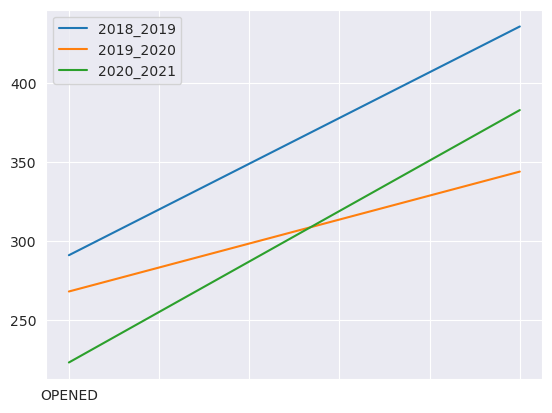

In [47]:
diff_df.plot()

<Axes: >

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

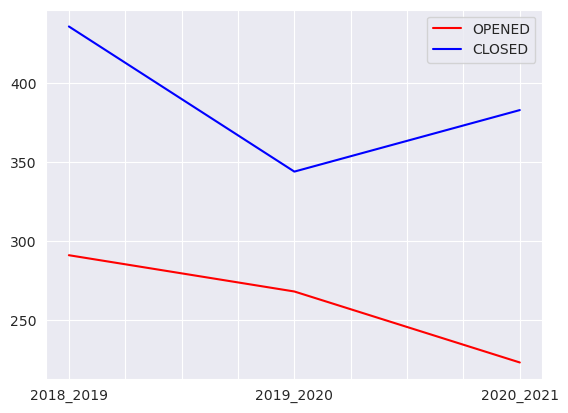

In [48]:
diff_df.T.plot(color=['r','b'])

#### 퀴즈 1. 2020년에 신규 개업한 셀프 주유소의 개수를 구하시오.

In [49]:
id_dict=dict()
for year in range(2018,2022):
    # NaN 값이 아닌 휘발유 가격을 가진 주유소의 id를 찾는다.
    non_null_brand = m.loc[(~m[f'상표_{year}'].isnull()) & (m['셀프여부']=='셀프')]
    opened_list = non_null_brand['번호'].unique()
    id_dict[year] = set(opened_list)
    
diff_dict=dict()
for year in range(2018,2021):
    opened = len(id_dict[year+1].difference(id_dict[year]))
    closed = len(id_dict[year].difference(id_dict[year+1]))
    diff_dict[f'{year}_{year+1}']=[opened,closed]
diff_df = pd.DataFrame(diff_dict,index=['OPENED','CLOSED'])  
diff_df

,2018_2019,2019_2020,2020_2021
OPENED,189,172,136
CLOSED,139,117,143


In [66]:
id_dict=dict()
for year in range(2018,2022):
    # NaN 값이 아닌 휘발유 가격을 가진 주유소의 id를 찾는다.
    mm = m[m['셀프여부']=='셀프']
    mm = mm[mm[f'상표_{year}'].notna()]
    opened_list = mm['번호'].unique()
    id_dict[year] = set(opened_list)
    
diff_dict=dict()
for year in range(2018,2021):
    opened = len(id_dict[year+1].difference(id_dict[year]))
    closed = len(id_dict[year].difference(id_dict[year+1]))
    diff_dict[f'{year}_{year+1}']=[opened,closed]
diff_df = pd.DataFrame(diff_dict,index=['OPENED','CLOSED'])  
diff_df

,2018_2019,2019_2020,2020_2021
OPENED,189,172,136
CLOSED,139,117,143


In [69]:
rows = []
for year in range(2018, 2021):
    # 전년도 & 다음년도 셀프 주유소 번호 추출
    prev = set(m.loc[(m['셀프여부'] == '셀프') & (m[f'상표_{year}'].notna()), '번호'])
    curr = set(m.loc[(m['셀프여부'] == '셀프') & (m[f'상표_{year+1}'].notna()), '번호'])
    opened = len(curr - prev)
    closed = len(prev - curr)
    rows.append({'기간': f'{year}_{year+1}', 'OPENED': opened, 'CLOSED': closed})

# 바로 DataFrame 생성
diff_df = pd.DataFrame(rows).set_index('기간').T
diff_df

기간,2018_2019,2019_2020,2020_2021
OPENED,189,172,136
CLOSED,139,117,143


In [71]:
# 1. 모든 연도에 대해 셀프 + 상표 존재하는 데이터만 필터링
df = pd.concat([
    m.loc[(m['셀프여부'] == '셀프') & (m[f'상표_{year}'].notna()), ['번호']].assign(연도=year)
    for year in range(2018, 2022)
])

# 2. 연도별로 번호 개수 pivot
pivot = df.drop_duplicates().pivot_table(
    index='번호', columns='연도', aggfunc='size', fill_value=0
)

# 3. 연속 연도간 OPENED / CLOSED 계산
diff_df = pd.DataFrame(index=['OPENED', 'CLOSED'])

for y in range(2018, 2021):
    prev = pivot[y]
    curr = pivot[y + 1]
    opened = ((prev == 0) & (curr == 1)).sum()
    closed = ((prev == 1) & (curr == 0)).sum()
    diff_df[f'{y}_{y+1}'] = [opened, closed]

diff_df

,2018_2019,2019_2020,2020_2021
OPENED,189,172,136
CLOSED,139,117,143


In [50]:
#  2020년에 신규 개업한 셀프 주유소의 개수를 구하여 quiz_1 변수에 저장합니다.
# 숫자형으로 저장합니다.
quiz_1 = 172

---

## 3. 브랜드 분석: 브랜드별 가격경쟁력 및 시장점유율 분석


### 3.1. 주요 브랜드별 가격 Line Plot 분석

In [51]:
brand_price_dict=dict()
for year in range(2018,2022):
    brand_price_dict[str(year)]=m.groupby(f'상표_{year}')[f'휘발유_{year}'].mean()

In [52]:
brand_price_df = pd.DataFrame(brand_price_dict)
brand_price_df

,2018,2019,2020,2021
GS칼텍스,1613.165695,1540.997849,1293.541879,1565.823135
NC오일,1580.880952,1513.285714,1256.357143,1542.619048
NH-OIL,1588.411114,1515.996650,1246.254150,1541.557866
S-OIL,1602.540115,1529.983482,1282.095394,1556.408657
SK가스,NaN,1488.000000,NaN,NaN
SK에너지,1625.460126,1547.655582,1293.732067,1565.577095
알뜰(ex),1581.561576,1494.770733,1213.862668,1503.712733
알뜰주유소,1580.825277,1501.781838,1243.666785,1528.513597
자가상표,1590.233309,1518.950920,1266.634483,1542.280423
현대오일뱅크,1600.777986,1528.850142,1284.379155,1559.624500


<Axes: >

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

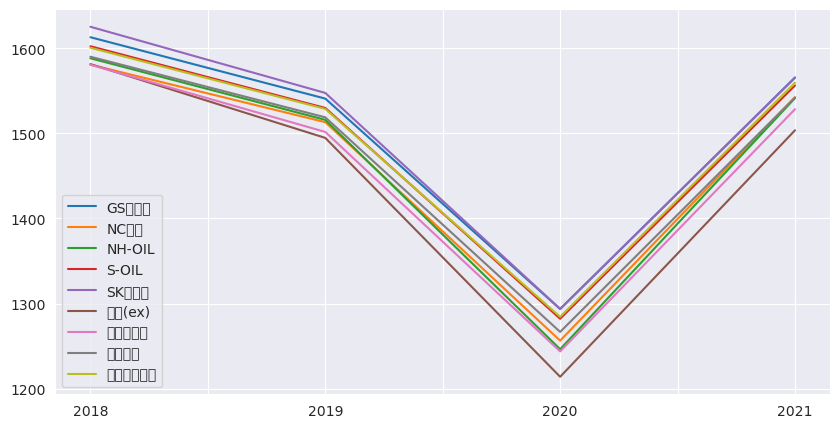

In [53]:
brand_price_df = brand_price_df.drop('SK가스')
brand_price_df.T.plot(figsize=(10,5))

### 3.2. 주요 브랜드별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap

In [54]:
brand_share_dict=dict()
for year in range(2018,2022):
    brand_share_dict[str(year)]=m.groupby(f'상표_{year}').size()

In [55]:
brand_share_df = pd.DataFrame(brand_share_dict)
brand_share_df

,2018,2019,2020,2021
GS칼텍스,2426.0,2391,2337.0,2295.0
NC오일,6.0,6,4.0,3.0
NH-OIL,581.0,597,611.0,632.0
S-OIL,2094.0,2093,2134.0,2124.0
SK가스,NaN,1,NaN,NaN
SK에너지,3474.0,3389,3075.0,2994.0
알뜰(ex),174.0,178,181.0,184.0
알뜰주유소,396.0,387,403.0,415.0
자가상표,199.0,163,145.0,135.0
현대오일뱅크,2206.0,2206,2445.0,2393.0


In [56]:
brand_share_df = brand_share_df.drop('SK가스')
# x/brand_share_df.sum() : 각 연도 별로 주유소 점유율을 계산.
brand_ratio_df = brand_share_df.apply(lambda x:x/brand_share_df.sum(),axis=1)
brand_ratio_df = brand_ratio_df.sort_values('2018',ascending=False)

In [57]:
# 각 column의 총합이 1로 나타난다.
brand_ratio_df

,2018,2019,2020,2021
SK에너지,0.300623,0.297020,0.271284,0.267919
GS칼텍스,0.209934,0.209553,0.206176,0.205369
현대오일뱅크,0.190897,0.193339,0.215704,0.214139
S-OIL,0.181205,0.183436,0.188266,0.190067
NH-OIL,0.050277,0.052323,0.053904,0.056555
알뜰주유소,0.034268,0.033918,0.035554,0.037136
자가상표,0.017220,0.014286,0.012792,0.012081
알뜰(ex),0.015057,0.015600,0.015968,0.016465
NC오일,0.000519,0.000526,0.000353,0.000268


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

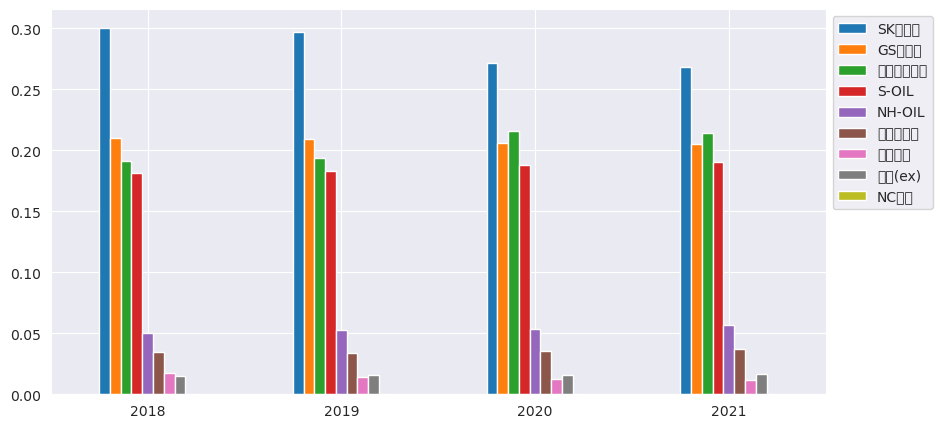

In [58]:
# kind='bar', stacked=True : 스택형 막대 그래프.
# rot=0 : x축의 글자가 돌아가는 것을 방지.
brand_ratio_df.T.plot(kind='bar',rot=0,figsize=(10,5))
# bbox_to_anchor=(1, 1) : legend() 박스가 그래프의 오른쪽에 위치하도록.
plt.legend(bbox_to_anchor=(1, 1))

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE

<Axes: >

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52860 (\N{HANGUL 

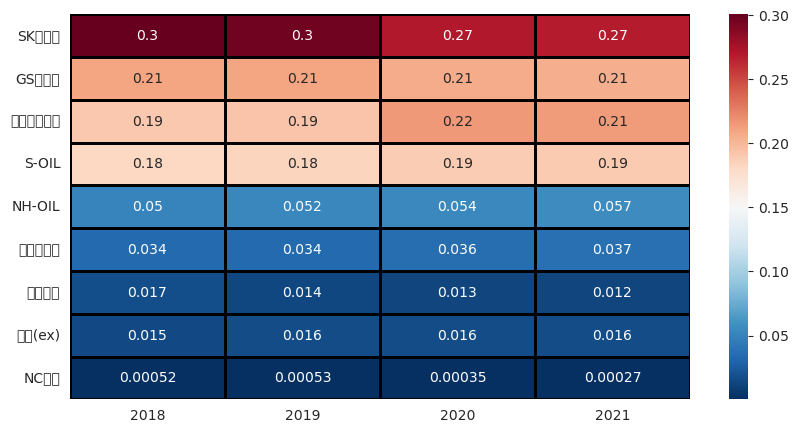

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(brand_ratio_df, cmap= 'RdBu_r', linewidths=1, linecolor='black',annot=True)

#### 퀴즈 2. 2019년 주유소를 셀프 및 일반 주유소로 구분하고 일반 주유소가 차지하는 비율을 구하시오

In [60]:
# 2019년도에 운영 중인 주유소들 데이터
opened_2019 = m.loc[~m['상표_2019'].isnull()]

# 셀프와 일반으로 나눠 묶는다.
is_self = opened_2019.groupby('셀프여부')
# 셀프와 일반 주유소의 비율을 계산.
self_ratio = is_self.size()/is_self.size().sum()
self_ratio

셀프여부
셀프    0.399001
일반    0.600999
dtype: float64

In [61]:
# 2019년 기준 일반 주유소의 시장 점유율을 quiz_2 변수에 저장합니다.
# 비율은 소숫점 둘째자리 까지 반올림하여 숫자형으로 제출합니다.
quiz_2 = 0.60

---

## 4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석

**BoxPlot**

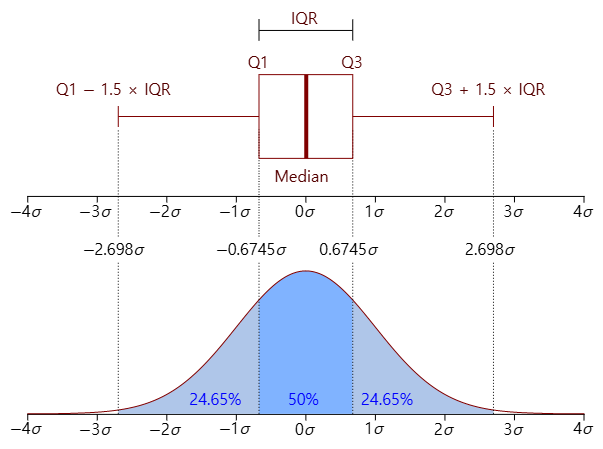

* 박스의 중앙선 = 전체 데이터의 중앙값(median)
* 박스 영역 = 하위 25%(Q1) ~ 상위 75%(Q3)의 범위를 나타냄.
* 이 박스 영역을 IQR(Q3-Q1)이라고 한다.
* 박스 좌우의 선은 Q1과 Q3에 1.5를 곱한 범위를 나타낸다. (이 범위를 넘어가면 '이상치'라고 판단한다.)

### 4.1. 가격 분포 Boxplot

<Axes: xlabel='휘발유_2021'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  func(*args, **kw

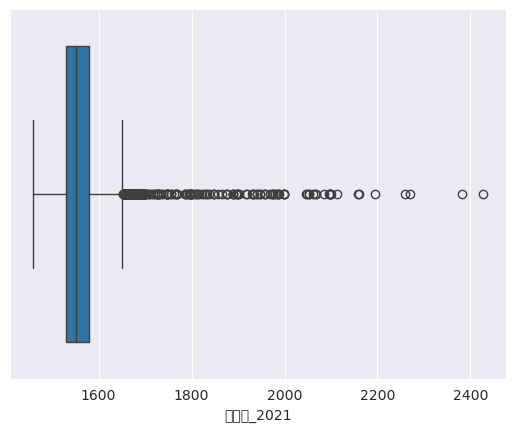

In [62]:
sns.boxplot(x=m['휘발유_2021'])

2021년 기준으로 대략 1650원 이상의 가격을 갖는 주유소들은 이상치라는 걸 알 수 있다.

### 4.2. 지역별 가격 분포 Boxplot (Multiple Columns)

<Axes: xlabel='지역2', ylabel='휘발유_2021'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/opt/anaconda3/envs/myenv/lib/p

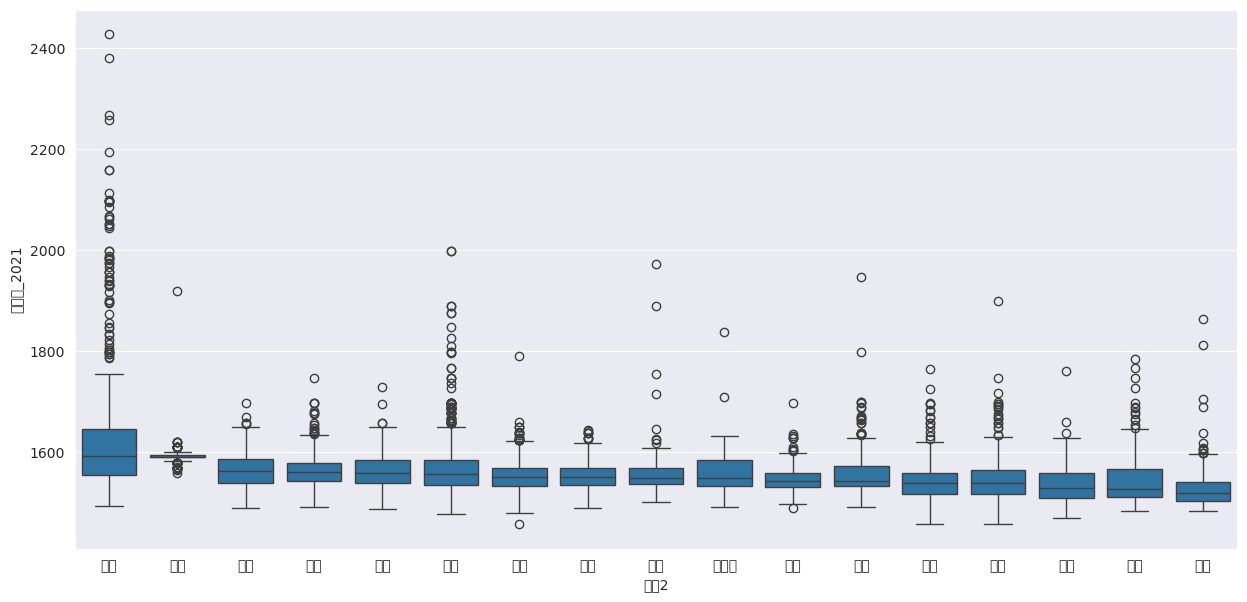

In [63]:
# 지역으로 묶은 뒤, 각 지역의 2021년의 휘발유 가격의 중앙값을 기준으로 정렬하고 그 인덱스를 기록.
# 중앙값 순위대로 그래프를 보기 위함.
boxplot_order = m.groupby('지역2')['휘발유_2021'].median().sort_values(ascending=False).index

plt.figure(figsize=(15,7))
sns.boxplot(x="지역2", y="휘발유_2021", data=m, orient="v", order=boxplot_order)

* 서울이 평균적으로 기름값이 비싸다.
* 제주도는 기름값이 대체로 균일하다.

 ---

## 제출하기

퀴즈 1번과 2번을 수행 후, 아래 코드를 실행하면 `quiz_1 ~ 2` 변수가 저장된 json 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [64]:
import json

student_answers = {}
student_answers["problem_1"] = int(quiz_1)
student_answers["problem_2"] = float(quiz_2)

with open("result.json", "w") as f:
    json.dump(student_answers, f)

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>